In [1]:
# Dataset about suicidal rates 1985 to 2016 
# October 2024

# Goal to identify which gender has most suicidal case and which year and which age 

import pandas as pd
import numpy as np



In [79]:
#load the file

df=pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [80]:
# Data exploration
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [81]:
#checking for missing values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [82]:
#Drop missing data

df.dropna(inplace=True)
df


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [83]:
df 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [84]:
#check for any duplicate rows in the dataset

df.duplicated().sum()
 

0

In [85]:
 
#Number of countries in the dataset
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia',
       'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Maldives',
       'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia',
       'Seychelles', 'Singapore', 'Slovakia', 'Slovenia

In [86]:
#Number of countries in the dataset
len(df.country.unique())

90

In [87]:
#Exploratory Data Analysis

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')





In [88]:
#Analysing suicide cases generally on the basis of sex by creating two seperate Dataframes (one for male the other for female)
df_male = df[df.sex == 'male']
df_female = df[df.sex == 'female']

df_male['age'].dtype


dtype('O')

In [89]:
#We now check if there are any null values present in the dataset
df.isnull().sum() 

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

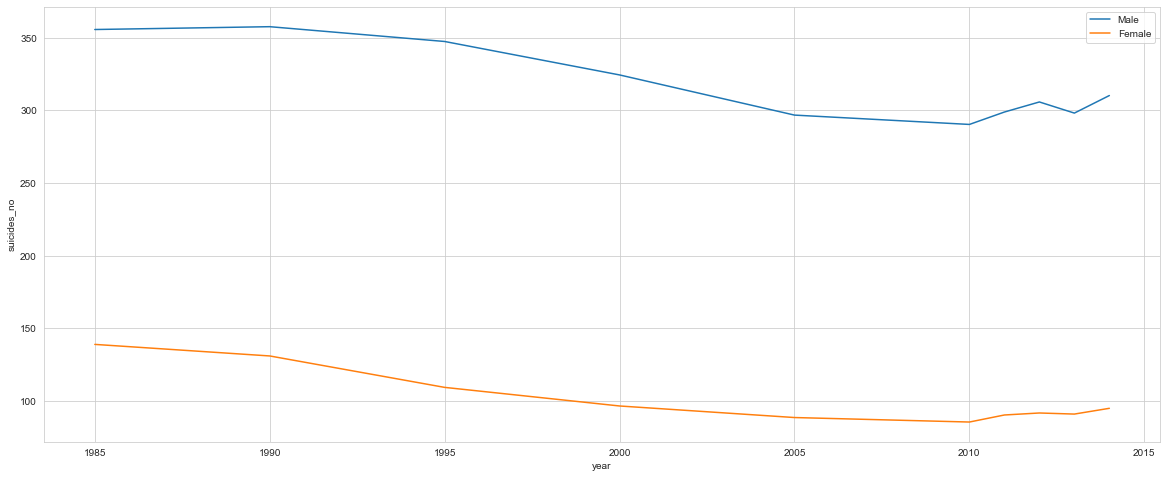

In [90]:
plt.figure(figsize = (20,8))
sns.lineplot(x=df_male.year, y=df_male.suicides_no,ci=None)
sns.lineplot(x=df_female.year, y=df_female.suicides_no,ci=None)
plt.legend(["Male",'Female'])
plt.show() 

In [ ]:
#Conclusion of this plot Male suicidal rate is more
        

In [118]:
# plotting male age and number of suicidal

df_male_grouped=df_male.groupby(["year","age"])['suicides_no'].sum()
df_male_grouped.head(20)

year  age        
1985  15-24 years    12112
      25-34 years    14759
      35-54 years    24813
      5-14 years       605
      55-74 years    18891
      75+ years       7784
1990  15-24 years    14125
      25-34 years    20258
      35-54 years    36025
      5-14 years       747
      55-74 years    24731
      75+ years      11406
1995  15-24 years    16679
      25-34 years    23830
      35-54 years    47620
      5-14 years       939
      55-74 years    30557
      75+ years      11715
2000  15-24 years    18177
      25-34 years    24791
Name: suicides_no, dtype: int64

In [119]:
 # Find the age group with the maximum male suicides

max_suicides_by_age = df_male_grouped.idxmax()
max_suicides_value = df_male_grouped.max()
print("Age Group with Most Suicides:", max_suicides_by_age)
print("Number of Suicides in that Age Group:", max_suicides_value)


Age Group with Most Suicides: (2000, '35-54 years')
Number of Suicides in that Age Group: 56418


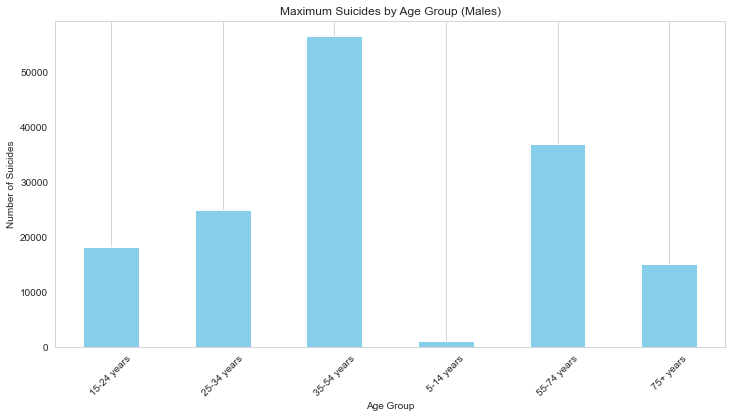

In [110]:
max_suicides_by_age = df_male_grouped.groupby('age').max()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
max_suicides_by_age.plot(kind='bar', color='skyblue')
plt.title('Maximum Suicides by Age Group (Males)')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Optional: Add a grid for easier interpretation
plt.show()

In [111]:
#Conclusion

#Age group 35-54 range has higher sucidal cases 